<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the dataset (CO<sub>2</sub> emission data)

In the dataset, the CO<sub>2</sub> emission for various regions in the world is given. Our objective is to group the regions based on the factors affecting the environment in terms of the greenhouse gases, where CO<sub>2</sub> is a primary greenhouse gas. 

Many developing and developed countries in the world are contributing to the CO<sub>2</sub> emission in the environment. It is interesting to know that the increase in atmospheric carbon dioxide is responsible for about two-thirds of the total energy imbalance that is causing Earth's temperature to rise and leads to global warming.

**Region**: Region of the country

**CO2 Emission**: Annual CO<sub>2</sub> emission (in tonnes)

**Ease of Business**: The ease of business in the country

**Energy Usage**: Energy used by the country in various forms

**GDP**: GDP of a country

**Internet Usage**: Usage of the internet 

**Population total**: Total population of a country

## Table of Content

1. **[Exploratory Data Analysis](#lib)**
2. **[Hierarchical Clustering](#hie)**
3. **[DBSCAN](#DBSCAN)**

#### Import the required libraries

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

#### Read the data

Load the csv file and print the first five observations.

In [105]:
data = pd.read_csv("CO2_emission_data.csv")

In [106]:
data

,Region,CO2 Emissions,Ease of Business,Energy Usage,GDP,Internet Usage,Population Total
0,Europe,4294,151,1976,5.652325e+09,0.010,3033659
1,Europe,4166,151,2172,7.464447e+09,0.024,3014579
2,Europe,4254,151,2172,8.376484e+09,0.060,2992724
3,Europe,3865,151,2068,9.132562e+09,0.096,2968028
4,Europe,4056,151,2025,1.070101e+10,0.150,2940880
...,...,...,...,...,...,...,...
1238,Africa,2274,90,7213,7.178556e+09,0.029,11470022
1239,Africa,2226,90,7396,1.070220e+10,0.042,11781612
1240,Africa,1654,90,7399,1.154142e+10,0.049,12109620
1241,Africa,1845,90,7641,1.464079e+10,0.056,12456527



### Let's begin with some hands-on practice exercises

<a id="lib"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Identify the different regions to which the countries belong and visualize the count of countries.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [107]:
data['Region'].value_counts()

Europe          302
The Americas    289
Africa          254
Asia            244
Middle East      92
Oceania          62
Name: Region, dtype: int64

<Axes: >

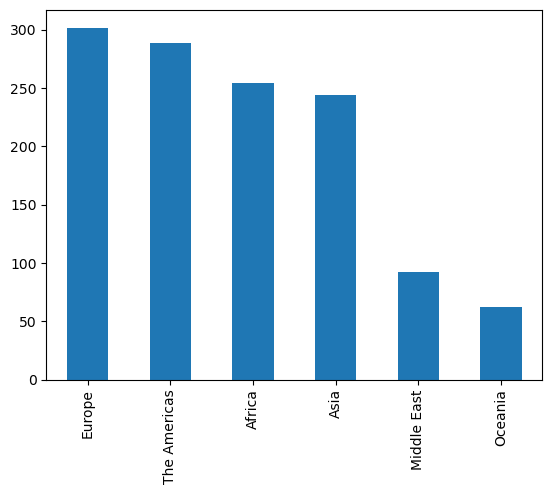

In [108]:
data['Region'].value_counts().plot(kind='bar')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the datatype, dimension and summary statistics of the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            1243 non-null   object 
 1   CO2 Emissions     1243 non-null   int64  
 2   Ease of Business  1243 non-null   int64  
 3   Energy Usage      1243 non-null   int64  
 4   GDP               1243 non-null   float64
 5   Internet Usage    1236 non-null   float64
 6   Population Total  1243 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 68.1+ KB


In [110]:
data.shape

(1243, 7)

In [111]:
data.describe()

,CO2 Emissions,Ease of Business,Energy Usage,GDP,Internet Usage,Population Total
count,1.243000e+03,1243.000000,1.243000e+03,1.243000e+03,1236.000000,1.243000e+03
mean,1.897666e+05,88.279968,7.541842e+04,3.535548e+11,0.329983,4.513494e+07
std,7.697027e+05,52.770388,2.707586e+05,1.358970e+12,1.634042,1.600483e+08
min,4.800000e+01,1.000000,3.000000e+01,1.232585e+08,0.000000,6.966000e+04
25%,3.111500e+03,45.000000,2.721000e+03,7.746581e+09,0.062000,2.097088e+06
50%,1.620800e+04,85.000000,9.318000e+03,2.468037e+10,0.200500,7.739900e+06
75%,7.581200e+04,131.000000,3.495650e+04,1.770000e+11,0.460000,2.884664e+07
max,8.286892e+06,186.000000,2.727728e+06,1.620000e+13,57.000000,1.350695e+09


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Drop the variables 'Region', 'Ease of Business', 'Internet Usage'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [112]:
df = data.drop(columns=['Region', 'Ease of Business', 'Internet Usage'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Check if there are missing values, if yes then remove the observations with missing values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [113]:
df.isnull().sum()

CO2 Emissions       0
Energy Usage        0
GDP                 0
Population Total    0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Check if there are outliers in the data and visualize the outliers using a boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

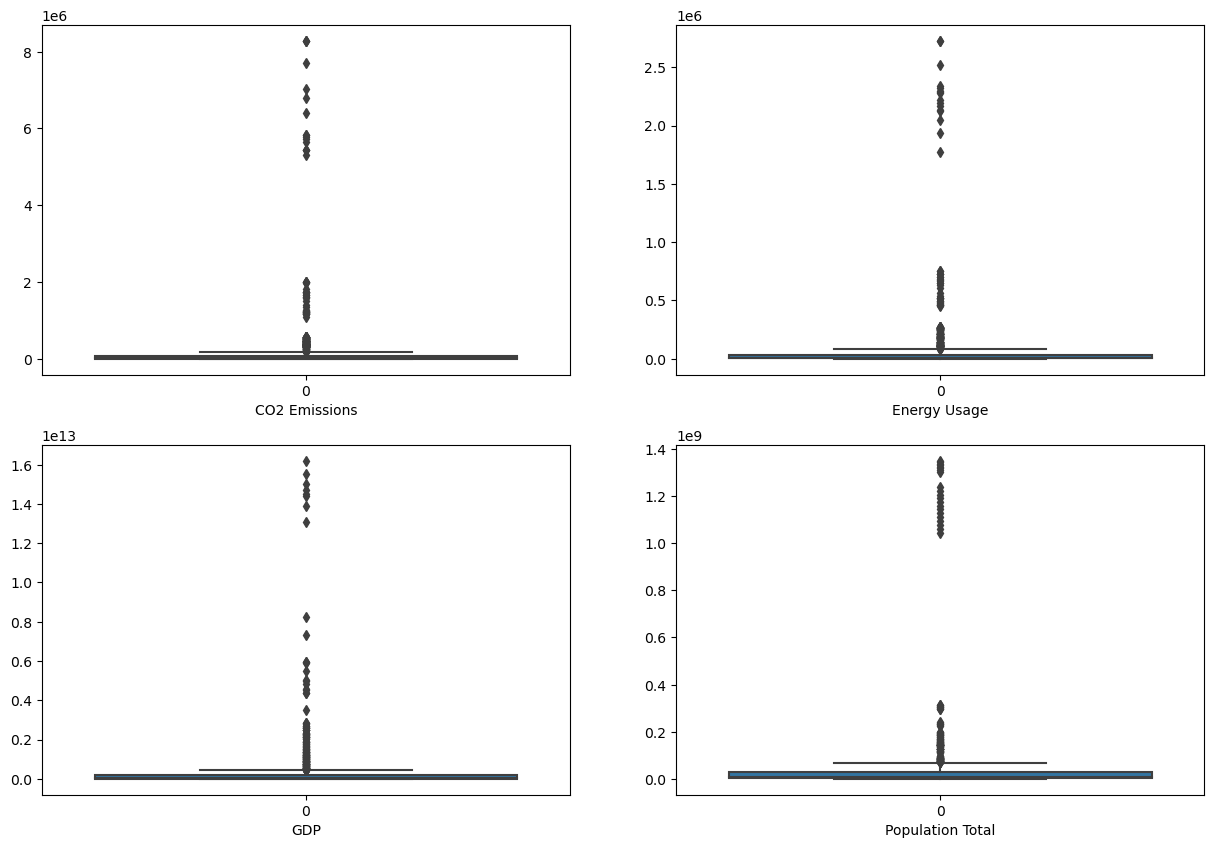

In [114]:
fig,ax =plt.subplots(2,2,figsize=(15,10))

for col,subplot in zip(df.columns,ax.flatten()):
    sns.boxplot(df[col],ax=subplot)
    subplot.set(xlabel=col)
    
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Remove the outliers using 3.5IQR and check the shape of the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [115]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
upper_limit = Q3 + 3.5*IQR
lower_limit = Q1 - 3.5*IQR

df = df[~((df > upper_limit)|(df<lower_limit)).any(axis=1)]

In [116]:
df.shape

(1054, 4)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Visualize the data obtained after removing the outliers with the help of a boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

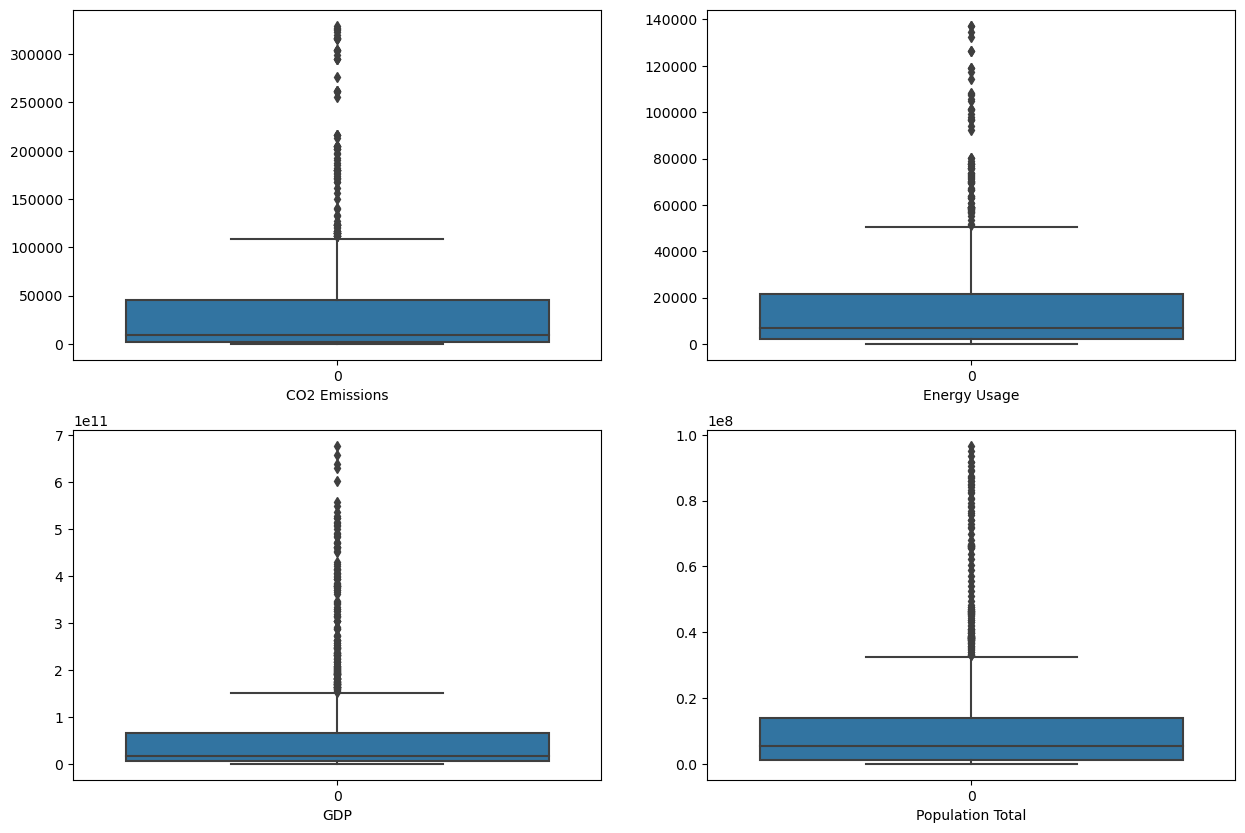

In [117]:
fig,ax =plt.subplots(2,2,figsize=(15,10))

for col,subplot in zip(df.columns,ax.flatten()):
    sns.boxplot(df[col],ax=subplot)
    subplot.set(xlabel=col)
    
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Transform the variables in the standard form such that they will have mean 0 and standard deviation 1 and get the summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [118]:
ss = StandardScaler()
scaled_data = ss.fit_transform(df)
scaled_data = pd.DataFrame(scaled_data,columns=df.columns)

C:\Users\akris\AppData\Local\Temp\ipykernel_20324\489784204.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_data[col],ax=subplot)
C:\Users\akris\AppData\Local\Temp\ipykernel_20324\489784204.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_data[col],ax=subplot)
C:\Users\akris

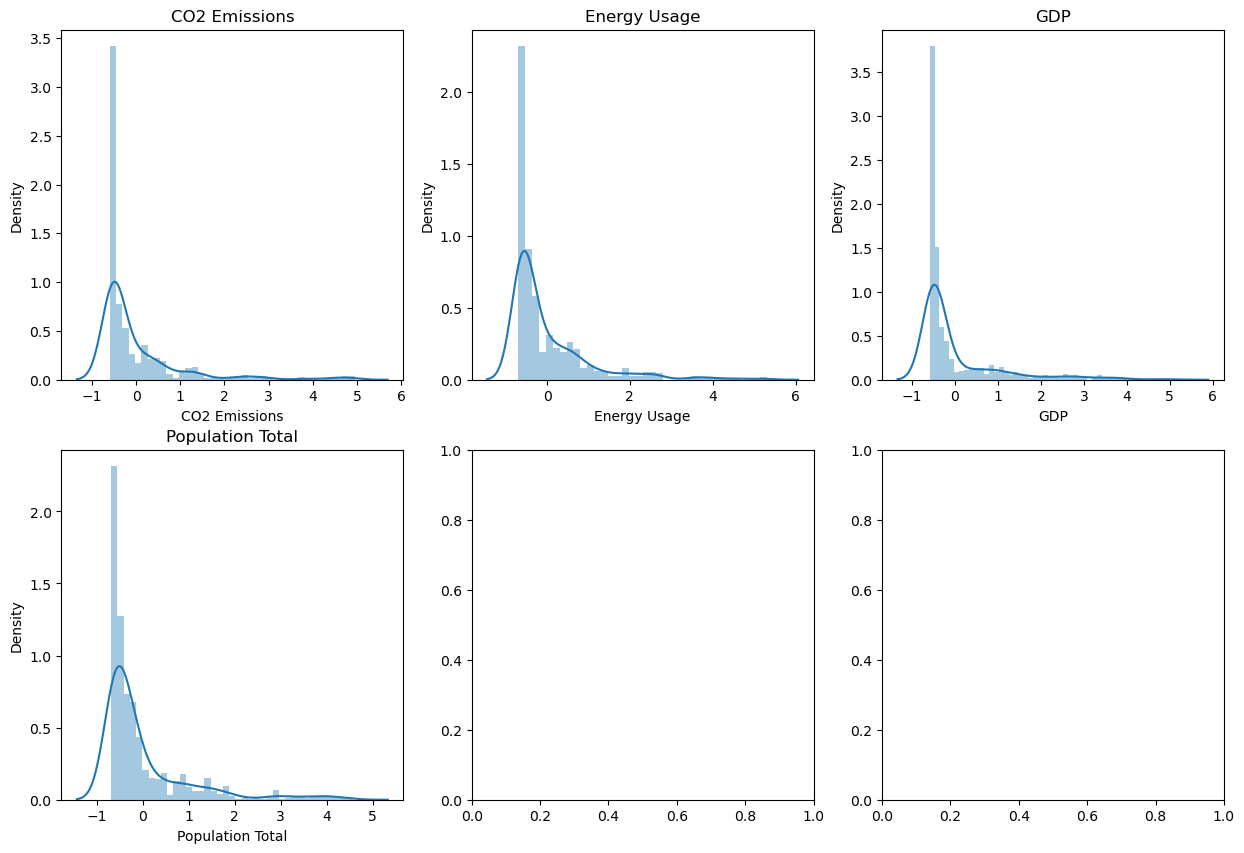

In [119]:
fig,ax = plt.subplots(2,3,figsize=(15,10))
for col,subplot in zip(scaled_data.select_dtypes(include=np.number).columns,ax.flatten()):
    sns.distplot(scaled_data[col],ax=subplot)
    subplot.set_title(col)  
plt.show()


In [120]:
scaled_data.describe()

,CO2 Emissions,Energy Usage,GDP,Population Total
count,1.054000e+03,1.054000e+03,1.054000e+03,1.054000e+03
mean,-1.348278e-17,6.741392e-18,2.696557e-17,-3.370696e-17
std,1.000475e+00,1.000475e+00,1.000475e+00,1.000475e+00
min,-5.951436e-01,-7.003763e-01,-5.936172e-01,-6.843682e-01
25%,-5.556345e-01,-6.130414e-01,-5.458443e-01,-6.156072e-01
50%,-4.348687e-01,-3.975408e-01,-4.468020e-01,-3.957295e-01
75%,1.737150e-01,2.374497e-01,-4.569213e-02,7.324626e-02
max,4.951400e+00,5.315282e+00,5.152770e+00,4.580071e+00


<a id="hie"></a>
## 2. Hierarchical Clustering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the 'ward' linkage method and print the first 10 observations of the linkage matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [121]:
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet
from scipy.spatial.distance import pdist

In [122]:
Z = linkage(scaled_data,method='ward')
print(Z)

[[3.80000000e+02 3.82000000e+02 2.25694801e-05 2.00000000e+00]
 [3.91000000e+02 3.92000000e+02 3.78208913e-05 2.00000000e+00]
 [3.81000000e+02 3.83000000e+02 8.63012142e-05 2.00000000e+00]
 ...
 [2.10000000e+03 2.10200000e+03 2.99034278e+01 1.78000000e+02]
 [2.10100000e+03 2.10400000e+03 3.29059328e+01 2.34000000e+02]
 [2.10300000e+03 2.10500000e+03 6.55836385e+01 1.05400000e+03]]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Visualize the clusters obtained using dendrogram and find the optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

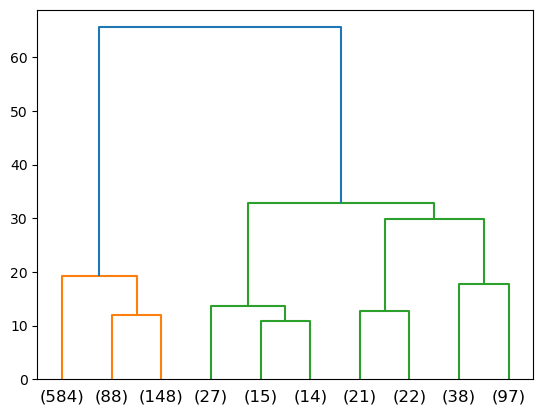

In [123]:
Z = linkage(scaled_data,method='ward')
dendrogram(Z,truncate_mode='lastp',p=10)
plt.show()


the optimal number of clusters is 2

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the cophenetic correlation coefficient and interpret it.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [124]:
method_list = ['single','complete','centroid','average','ward']

In [125]:
for metho in method_list:
    Z = linkage(scaled_data,method = metho)
    c,coph_dist = cophenet(Z,pdist(scaled_data))
    print('Cophenetic Coefficent of',metho,'is',c)
    #dendrogram(Z,truncate_mode= 'lastp' ,p=20)

Cophenetic Coefficent of single is 0.8944175015557045
Cophenetic Coefficent of complete is 0.8574402670528408
Cophenetic Coefficent of centroid is 0.9295216443151505
Cophenetic Coefficent of average is 0.9305121454315446
Cophenetic Coefficent of ward is 0.7973822617121826


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Instantiate clustering method with an optimal number of clusters and 'ward' linkage method.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [126]:
from sklearn.cluster import KMeans

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


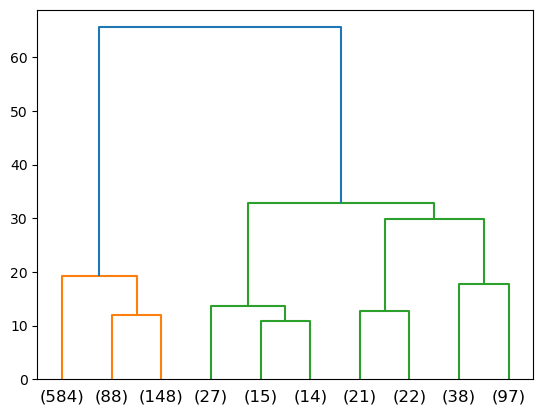

In [127]:
model = KMeans(n_clusters = 2,random_state = 100)
model.fit(df)
Z = linkage(scaled_data,method='ward')
dendrogram(Z,truncate_mode='lastp',p=10)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Obtain the cluster labels and add a column containing the cluster number to the original data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [128]:
df['labels'] = model.labels_

In [129]:
df

,CO2 Emissions,Energy Usage,GDP,Population Total,labels
0,4294,1976,5.652325e+09,3033659,1
1,4166,2172,7.464447e+09,3014579,1
2,4254,2172,8.376484e+09,2992724,1
3,3865,2068,9.132562e+09,2968028,1
4,4056,2025,1.070101e+10,2940880,1
...,...,...,...,...,...
1238,2274,7213,7.178556e+09,11470022,1
1239,2226,7396,1.070220e+10,11781612,1
1240,1654,7399,1.154142e+10,12109620,1
1241,1845,7641,1.464079e+10,12456527,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the size of each cluster and plot the count plot for the cluster size.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: >

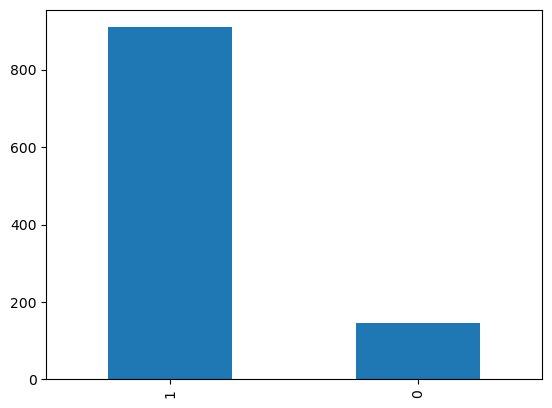

In [130]:
df['labels'].value_counts().plot(kind='bar')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Plot the scatterplot to visualize the clusters using 'CO2 Emissions' and 'Energy Usage'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\akris\AppData\Local\Temp\ipykernel_20324\4169414985.py:1: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df,x='CO2 Emissions',y='Energy Usage',hue='labels',palette=['blue','yellow','orange','black'])


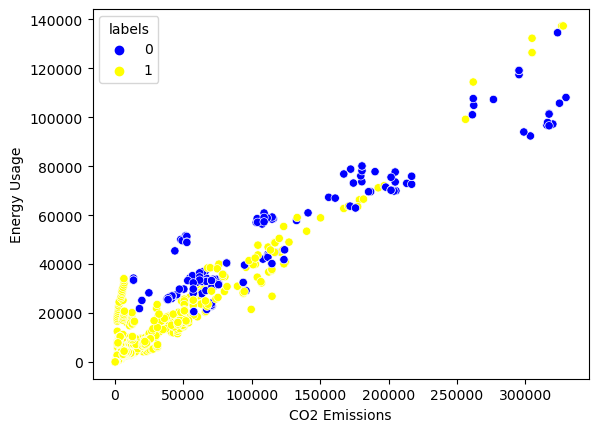

In [131]:
sns.scatterplot(data=df,x='CO2 Emissions',y='Energy Usage',hue='labels',palette=['blue','yellow','orange','black'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Obtain the first 10 observations for 1st cluster and find its summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [132]:
df[df['labels']==0].iloc[:10,:]

,CO2 Emissions,Energy Usage,GDP,Population Total,labels
16,123475,41852,1.990000e+11,37762962,0
17,123475,41852,2.040000e+11,38481705,0
39,141077,60954,3.440000e+11,36903067,0
40,132632,57835,3.250000e+11,37273361,0
43,156170,67303,1.830000e+11,38308779,0
44,160952,66973,2.230000e+11,38647854,0
45,174238,73128,2.640000e+11,38988923,0
46,180416,73673,3.300000e+11,39331357,0
47,190057,77794,4.060000e+11,39676083,0
48,179639,76075,3.780000e+11,40023641,0


In [133]:
df[df['labels']==0].iloc[:10,:].describe()

,CO2 Emissions,Energy Usage,GDP,Population Total,labels
count,10.000000,10.000000,1.000000e+01,1.000000e+01,10.0
mean,156213.100000,63743.900000,2.856000e+11,3.853977e+07,0.0
std,24846.316429,13167.355209,8.099273e+10,1.015210e+06,0.0
min,123475.000000,41852.000000,1.830000e+11,3.690307e+07,0.0
25%,134743.250000,58614.750000,2.087500e+11,3.789942e+07,0.0
50%,158561.000000,67138.000000,2.945000e+11,3.856478e+07,0.0
75%,178288.750000,73536.750000,3.405000e+11,3.924575e+07,0.0
max,190057.000000,77794.000000,4.060000e+11,4.002364e+07,0.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Obtain the first 10 observations for the 2nd cluster and find its summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [134]:
df[df['labels']==1].iloc[:10,:]

,CO2 Emissions,Energy Usage,GDP,Population Total,labels
0,4294,1976,5.652325e+09,3033659,1
1,4166,2172,7.464447e+09,3014579,1
2,4254,2172,8.376484e+09,2992724,1
3,3865,2068,9.132562e+09,2968028,1
4,4056,2025,1.070101e+10,2940880,1
5,4129,2061,1.288135e+10,2912559,1
6,3880,2068,1.204421e+10,2884303,1
7,4283,2059,1.192695e+10,2856673,1
8,92533,30698,6.786383e+10,33003442,1
9,89493,30974,8.532500e+10,33461345,1


In [135]:
df[df['labels']==0].iloc[:10,:].describe()

,CO2 Emissions,Energy Usage,GDP,Population Total,labels
count,10.000000,10.000000,1.000000e+01,1.000000e+01,10.0
mean,156213.100000,63743.900000,2.856000e+11,3.853977e+07,0.0
std,24846.316429,13167.355209,8.099273e+10,1.015210e+06,0.0
min,123475.000000,41852.000000,1.830000e+11,3.690307e+07,0.0
25%,134743.250000,58614.750000,2.087500e+11,3.789942e+07,0.0
50%,158561.000000,67138.000000,2.945000e+11,3.856478e+07,0.0
75%,178288.750000,73536.750000,3.405000e+11,3.924575e+07,0.0
max,190057.000000,77794.000000,4.060000e+11,4.002364e+07,0.0


<a id="DBSCAN"></a>
## 3. DBSCAN

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Perform DBSCAN for the data given using 0.7 as epsilon and 9 minimum samples. Display the unique number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [144]:
from sklearn.cluster import DBSCAN

In [145]:
scaled_data.iloc[:,:4]

,CO2 Emissions,Energy Usage,GDP,Population Total
0,-0.523682,-0.615122,-0.546747,-0.522900
1,-0.525836,-0.606536,-0.531386,-0.523940
2,-0.524355,-0.606536,-0.523654,-0.525130
3,-0.530902,-0.611092,-0.517245,-0.526476
4,-0.527688,-0.612976,-0.503949,-0.527955
...,...,...,...,...
1049,-0.557679,-0.385690,-0.533809,-0.063318
1050,-0.558487,-0.377673,-0.503939,-0.046343
1051,-0.568114,-0.377542,-0.496825,-0.028475
1052,-0.564900,-0.366940,-0.470552,-0.009577


In [146]:
db = DBSCAN(eps=0.7,min_samples=9)
db.fit(scaled_data.iloc[:,:4])
scaled_data['labeled_db'] = db.labels_

In [147]:
scaled_data['labeled_db'].unique()

array([ 0, -1,  1], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check for the size of each cluster and plot the count plot for the cluster size.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [148]:
scaled_data['labeled_db'].value_counts()

 0    953
-1     92
 1      9
Name: labeled_db, dtype: int64

<Axes: xlabel='labeled_db', ylabel='count'>

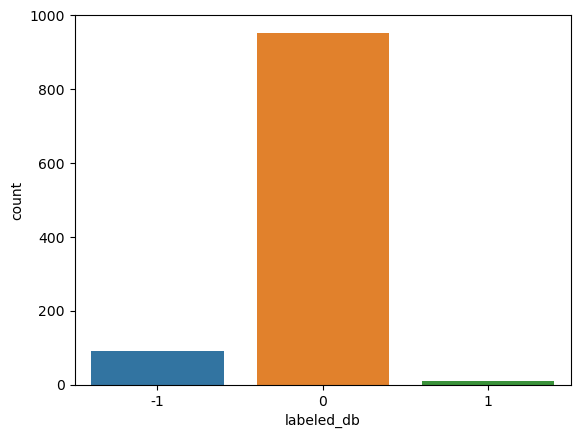

In [149]:
sns.countplot(x=scaled_data['labeled_db'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Describe the outliers identified by the DBSCAN algorithm in the previous question.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [150]:
scaled_data[scaled_data['labeled_db']==-1]

,CO2 Emissions,Energy Usage,GDP,Population Total,labeled_db
39,1.778417,1.968694,2.321439,1.322182,-1
40,1.636285,1.832051,2.160376,1.342355,-1
42,1.644616,1.885148,0.736233,1.380327,-1
43,2.032436,2.246842,0.956636,1.398761,-1
44,2.112919,2.232385,1.295718,1.417232,-1
...,...,...,...,...,...
1038,1.128414,1.159132,-0.032027,3.850428,-1
1039,1.316829,1.303792,0.061583,3.899898,-1
1040,1.544257,1.444290,0.245669,3.948992,-1
1041,1.761250,1.639945,0.303904,3.998167,-1


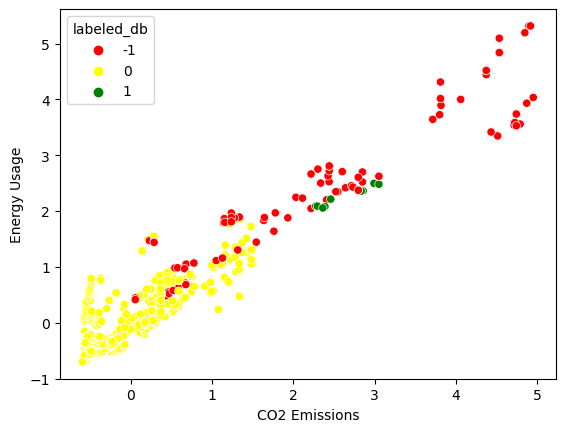

In [151]:
sns.scatterplot(x=scaled_data['CO2 Emissions'],y=scaled_data['Energy Usage'],hue=scaled_data['labeled_db'],palette=['RED','YELLOW','GREEN'])
plt.show()

<Axes: xlabel='CO2 Emissions', ylabel='Energy Usage'>

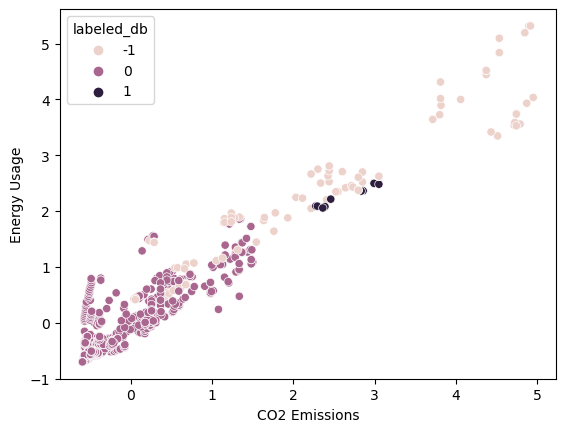

In [152]:
sns.scatterplot(x=scaled_data['CO2 Emissions'],y=scaled_data['Energy Usage'],hue=scaled_data['labeled_db'])